In [22]:
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
df = pd.read_csv('mlb_game_data_2025.csv')  # Load your dataset

In [7]:
df

,Date,Home Team,Away Team,Difference doubles,Difference triples,Difference homeruns,Difference hits,Difference hitbypitch,Difference avg,Difference obp,...,Difference ops,Difference groundintodoubleplay,Difference leftonbase,Difference strikeouts,Difference baseonballs,Difference whip,Difference strikepercentage,Difference pitchesperinning,Difference homerunsper9,Home Team Won
0,"March 27, 2025",NYY,MIL,0.0,0.0,1.0,0.0,0.0,0.029,0.035,...,0.185,0.0,-3.0,3.0,0.0,-0.16,0.05,-0.06,-1.25,True
1,"March 27, 2025",TOR,BAL,-1.0,0.0,-5.0,-10.0,-1.0,-0.216,-0.171,...,-0.767,2.0,-8.0,5.0,0.0,1.11,0.04,7.11,5.00,False
2,"March 27, 2025",TEX,BOS,1.0,0.0,-2.0,1.0,0.0,0.030,0.007,...,-0.115,1.0,5.0,6.0,1.0,0.00,-0.01,2.00,2.00,False
3,"March 27, 2025",WSH,PHI,-1.0,-1.0,-1.0,-3.0,1.0,-0.064,-0.083,...,-0.296,1.0,0.0,6.0,3.0,0.60,-0.01,2.20,0.90,False
4,"March 27, 2025",KC,CLE,-1.0,-1.0,0.0,-3.0,0.0,-0.078,-0.101,...,-0.258,-1.0,-1.0,-5.0,2.0,0.50,-0.04,1.00,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,"September 28, 2025",CLE,TEX,0.0,0.0,1.0,4.0,-1.0,-0.008,-0.006,...,-0.014,0.0,0.0,-1.0,-2.0,0.08,0.02,-6.86,-1.10,True
2459,"September 28, 2025",MIA,NYM,2.0,1.0,0.0,4.0,1.0,0.001,-0.012,...,-0.046,-2.0,-5.0,5.0,4.0,-0.02,-0.12,-1.19,0.00,True
2460,"September 28, 2025",MIL,CIN,3.0,0.0,-1.0,2.0,3.0,0.013,0.017,...,0.029,-1.0,15.0,-2.0,-4.0,0.01,0.03,-5.46,0.87,True
2461,"September 28, 2025",ATL,PIT,1.0,0.0,1.0,0.0,0.0,0.014,0.015,...,0.064,0.0,-2.0,4.0,-1.0,0.09,0.00,0.14,-1.13,True


In [19]:
y = df['Home Team Won'].to_numpy()

feature_columns= [
    'Difference strikeouts',               
    'Difference baseonballs']

X = df[feature_columns].to_numpy()

X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

print(np.shape(X), np.shape(y))

(2463, 2) (2463,)


Text(0.5, 0, 'Difference hits')

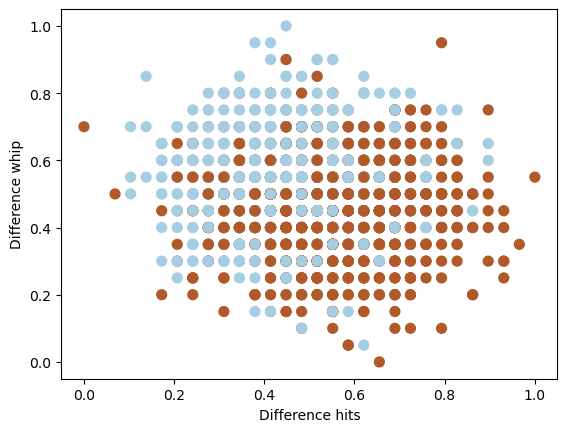

In [20]:
plt.scatter(X_normalized[:,0], X_normalized[:,1], c=y, s=50, cmap= plt.cm.Paired)
plt.ylabel('Difference whip')
plt.xlabel('Difference hits')


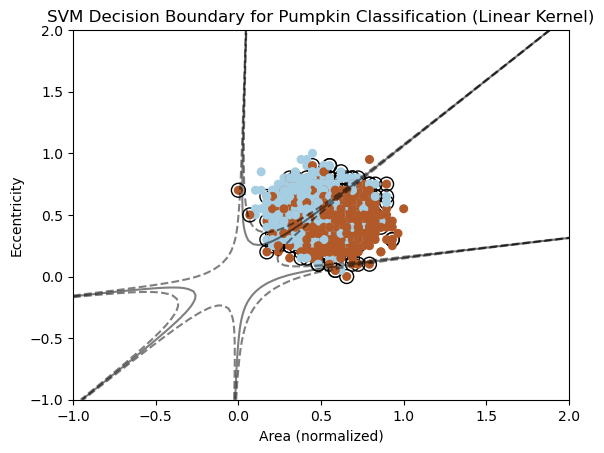

Training and plotting time: 99.33733606338501 seconds


In [25]:
initial_time = time.time()

clf = svm.SVC(kernel = 'poly', C=1000)
clf.fit(X_normalized,y)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    clf, X_normalized, plot_method = "contour", colors = "k", levels = [-1,0, 1], alpha=0.5, linestyles = ["--", "-", "--"], ax=ax,)

ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s = 100, linewidth=1, facecolors="none", edgecolors="k",)
ax.scatter(X_normalized[:,0], X_normalized[:,1], c=y, s=30, cmap = plt.cm.Paired)

plt.xlabel('Area (normalized)')
plt.ylabel('Eccentricity')
plt.title('SVM Decision Boundary for Pumpkin Classification (Linear Kernel)')
plt.show()

final_time = time.time()
print("Training and plotting time:", final_time - initial_time, "seconds")